# Coursera Spacecraft Dynamics and Control - Kinematics
## Module 3
## Concept Check 20 - MRP Differential Kinematic Equation

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import sys

sys.path.append('../')

import attitude_math as am

## Question 4

Given 
$\sigma(0) = (0.4, 0.2, -0.1)$, write a program to integrate the MRP differential kinematic equations. Assume the body angular velocity vector of the craft is given through the $\mathbf{B}$ frame components as: $$^\mathbf{B}\omega = \begin{pmatrix} \sin(0.1t) \\ 0.01\\ \cos(0.1t) \end{pmatrix} 20\text{deg/s}$$

Be sure to only use the short rotation version of the MRPs. Enter below the MRP norm $\sigma_{1}^{2} + \sigma_{2}^{2} + \sigma_{3}^{2}$ at 42 seconds.


0.6394653582074666


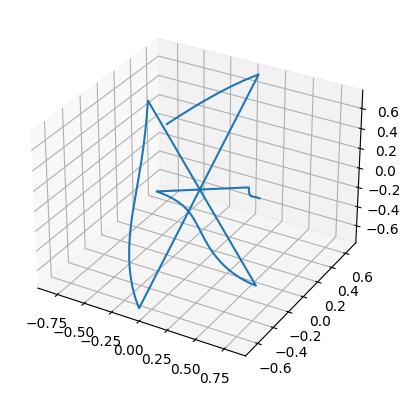

0.6394466322167607


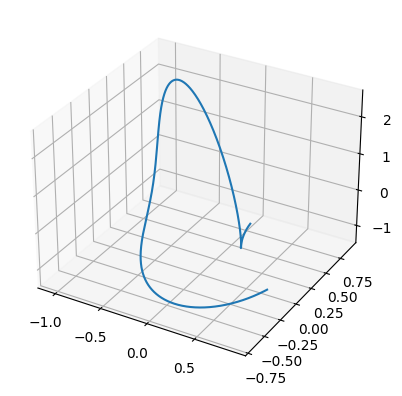

In [9]:
def p_dot(p, t):
    omega_B = np.array([np.sin(0.1*t), 0.01, np.cos(0.1*t)]) * np.deg2rad(20)
    return am.MRP_omega_DKE(p, omega_B)

sigma_0 = np.array([0.4, 0.2, -0.1])

# Integrate the MRP differential kinematic equations
sigma_t = am.MRP_short_integrator(p_dot, sigma_0, 0., 42., .01)

# Calculate the MRP norm squared
print(np.linalg.norm(sigma_t[-1]))
ax = plt.figure().add_subplot(projection='3d')
ax.plot(sigma_t[:,0], sigma_t[:,1], sigma_t[:,2])
plt.show()

# Integrate the MRP differential kinematic equations
sigma_t = scipy.integrate.odeint(p_dot, sigma_0, np.arange(0., 42., .01))

# Calculate the MRP norm squared
print(np.linalg.norm(am.MRP_short(sigma_t[-1])))
ax = plt.figure().add_subplot(projection='3d')
ax.plot(sigma_t[:,0], sigma_t[:,1], sigma_t[:,2])
plt.show()